In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chic

In [2]:
rng = np.random.default_rng()

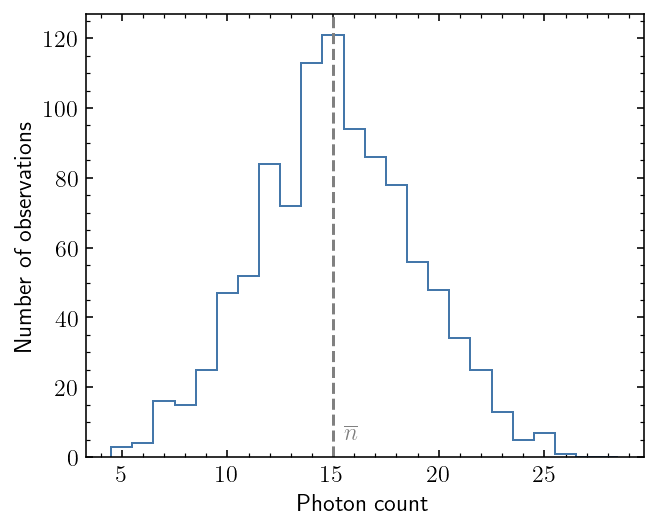

Bias: -0.877


In [3]:
n_bar = 15
N = 1_000

def generate():
    return rng.poisson(lam=n_bar, size=(N,))

n_i = generate()

plt.hist(n_i, bins=np.arange(n_i.min(), n_i.max() + 1) - 0.5, histtype='step')
plt.axvline(n_bar, ls='--', color='grey')
plt.text(n_bar + 0.5, 0 + 5, "$\\overline{n}$", color='grey')
plt.xlabel('Photon count')
plt.ylabel('Number of observations')
plt.show()


# estimate noise as sigma_i^2 = n_i

sigma_sq_i = np.maximum(n_i, np.ones_like(n_i))
estimate = np.sum( n_i / sigma_sq_i ) / np.sum( 1. / sigma_sq_i )

print(f"Bias: {estimate - n_bar:.3f}")

In [4]:
N_trials = 1_000
biases = np.zeros((N_trials,))

for i in range(N_trials):
    n_i = generate()
    var_i = np.maximum(n_i, np.ones_like(n_i))
    estimate = np.sum(n_i / var_i) / np.sum(1. / var_i)
    biases[i] = estimate - n_bar

In [5]:
from scipy.special import expi

def expected_bias(n_bar):
    return -n_bar + np.exp(n_bar) / (1 - np.euler_gamma + expi(n_bar) - np.log(n_bar))

expected_bias(n_bar)

-1.0865386676894229

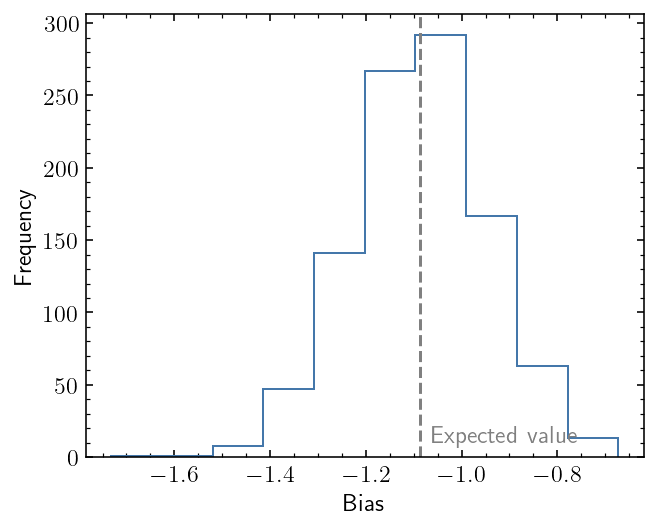

In [6]:
expected = expected_bias(n_bar)
plt.hist(biases, histtype='step')
plt.axvline(expected, ls='--', color='grey')
plt.text(expected + 0.025, 0 + 10, "Expected value", color='grey')
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.show()

In [7]:
n_bars = np.linspace(1e-4, 20, num=20)
med_biases = []

for n_bar in n_bars:
    biases = np.zeros((N_trials,))

    for i in range(N_trials):
        n_i = generate()
        var_i = np.maximum(n_i, np.ones_like(n_i))
        estimate = np.sum(n_i / var_i) / np.sum(1. / var_i)
        biases[i] = estimate - n_bar

    med_biases.append(np.median(biases))

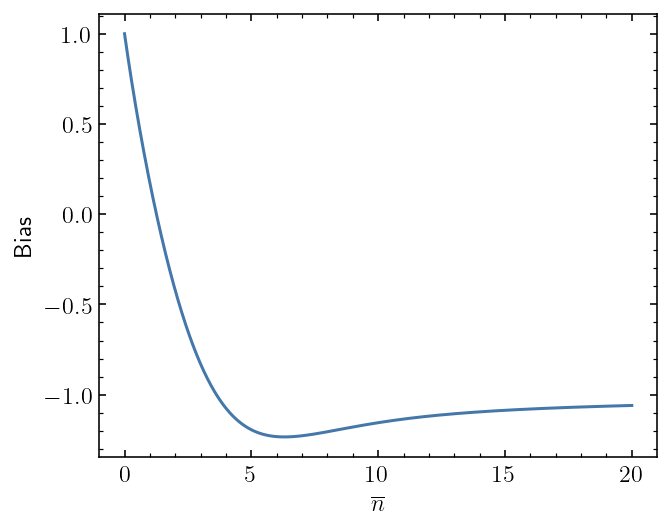

In [8]:
_n_bars = np.linspace(1e-4, 20, 1_000)
_biases = expected_bias(_n_bars)

plt.plot(_n_bars, _biases, label='Analytic expectation')
plt.xlabel('$\\overline{n}$')
plt.ylabel('Bias')
plt.savefig('figures/analytic_estimate.pdf', bbox_inches='tight')
plt.show()

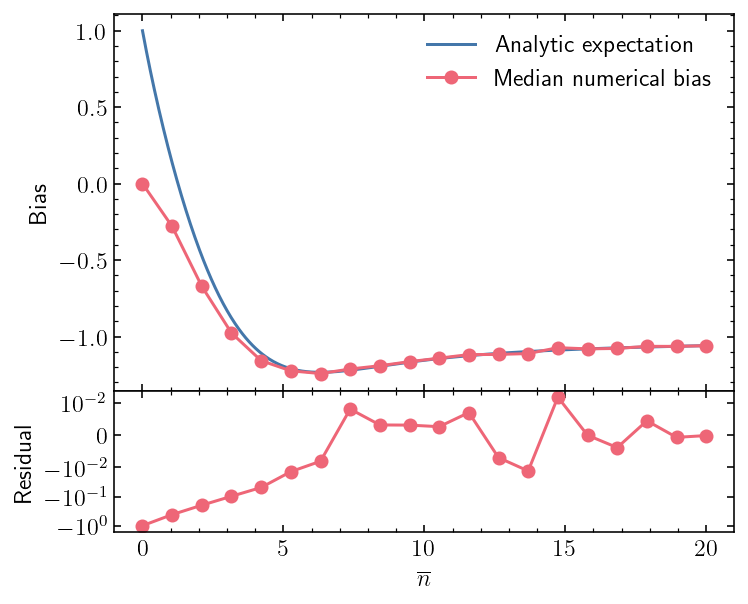

In [9]:
_n_bars = np.linspace(1e-4, 20, 1_000)
_biases = expected_bias(_n_bars)

fig, axs = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[8, 3]), sharex=True)

axs[0].plot(_n_bars, _biases, label='Analytic expectation')
axs[0].plot(n_bars, med_biases, 'o-', label='Median numerical bias')

axs[1].plot(n_bars, med_biases - expected_bias(n_bars), 'o-', color='C1')
axs[1].set_yscale('symlog', linthresh=1e-2)

axs[1].set_xlabel('$\\overline{n}$')
axs[0].set_ylabel('Bias')
axs[1].set_ylabel('Residual')

axs[0].legend(frameon=False)

axs[0].tick_params(direction='in')

fig.tight_layout(pad=0)

plt.savefig('figures/numerical_estimate.pdf', bbox_inches='tight')

plt.show()

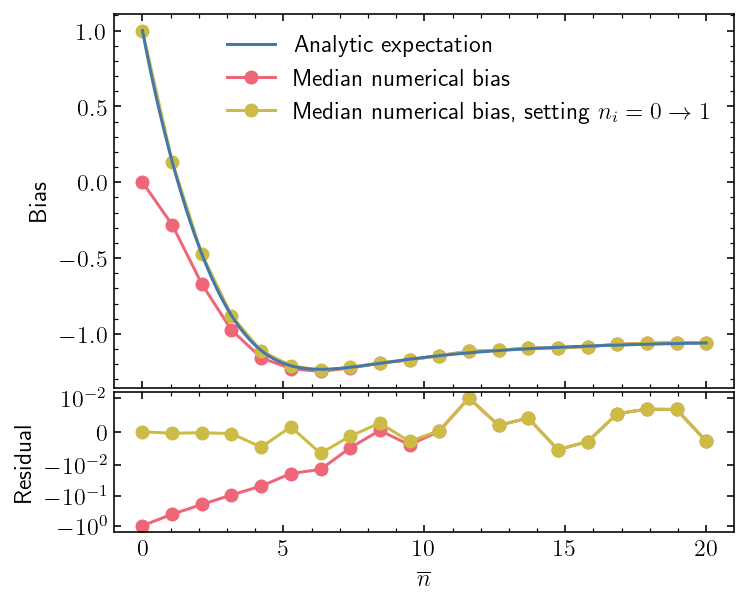

In [10]:
n_bars = np.linspace(1e-4, 20, num=20)
med_biases = []
matched_biases = []

for n_bar in n_bars:
    biases = np.zeros((N_trials,))
    mbiases = np.zeros((N_trials,))

    for i in range(N_trials):
        n_i = generate()
        var_i = np.maximum(n_i, np.ones_like(n_i))
        estimate = np.sum(n_i / var_i) / np.sum(1. / var_i)
        biases[i] = estimate - n_bar
        
        n_i = np.maximum(n_i, np.ones_like(n_i))
        estimate = np.sum(n_i / var_i) / np.sum(1. / var_i)
        mbiases[i] = estimate - n_bar

    med_biases.append(np.median(biases))
    matched_biases.append(np.median(mbiases))

_n_bars = np.linspace(1e-4, 20, 1_000)
_biases = expected_bias(_n_bars)

fig, axs = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[8, 3]), sharex=True)

axs[0].plot(_n_bars, _biases, label='Analytic expectation', zorder=1)
axs[0].plot(n_bars, med_biases, 'o-', label='Median numerical bias', zorder=0)
axs[0].plot(n_bars, matched_biases, 'o-', label='Median numerical bias, setting $n_i = 0 \\to 1$', zorder=0, color='C3')

axs[1].plot(n_bars, med_biases - expected_bias(n_bars), 'o-', color='C1')
axs[1].plot(n_bars, matched_biases - expected_bias(n_bars), 'o-', color='C3')
axs[1].set_yscale('symlog', linthresh=1e-2)

axs[1].set_xlabel('$\\overline{n}$')
axs[0].set_ylabel('Bias')
axs[1].set_ylabel('Residual')

axs[0].legend(frameon=False)

axs[0].tick_params(direction='in')

fig.tight_layout(pad=0)

plt.savefig('figures/difference_explanation.pdf', bbox_inches='tight')

plt.show()